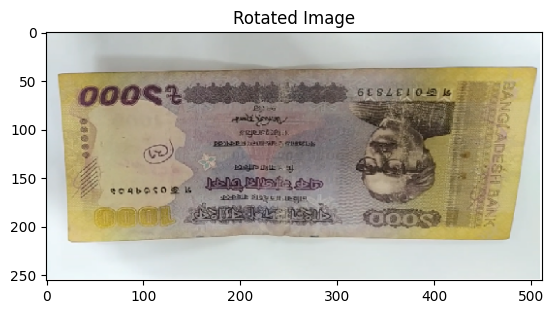

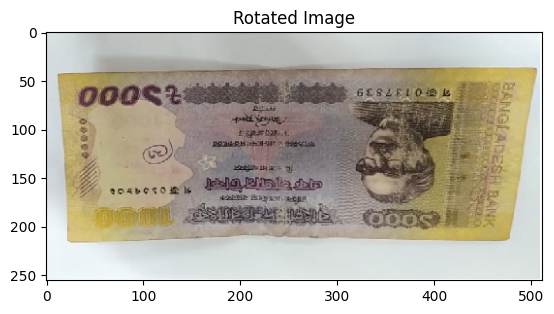

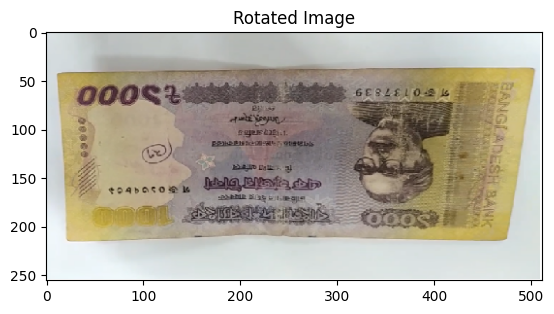

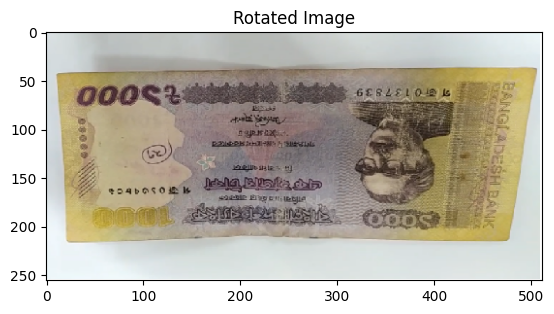

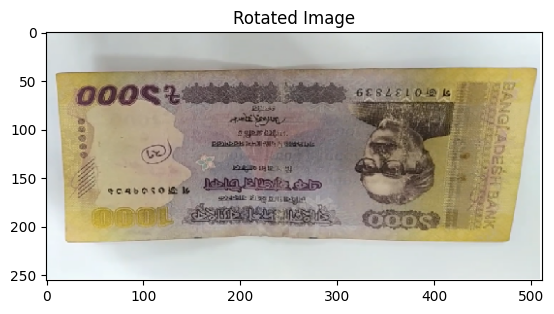

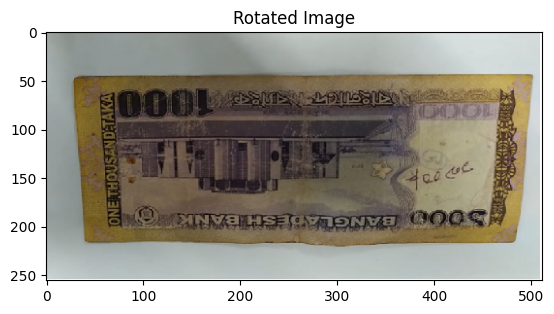

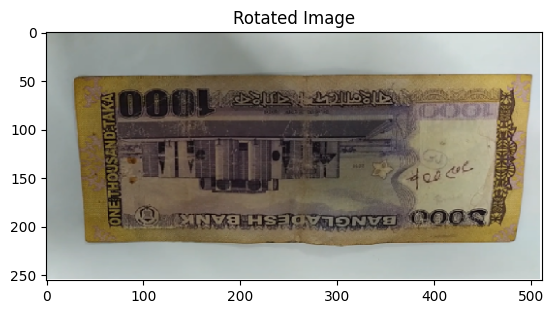

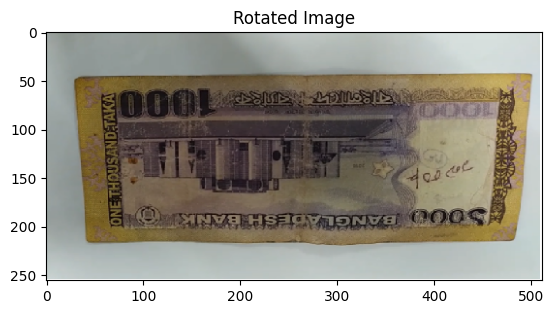

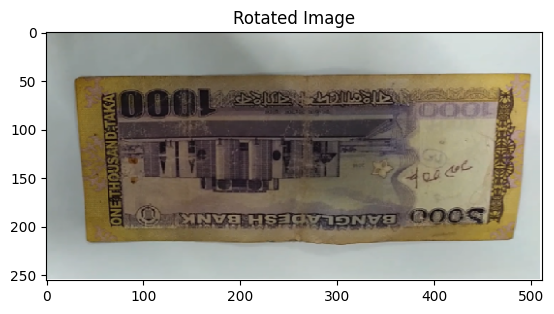

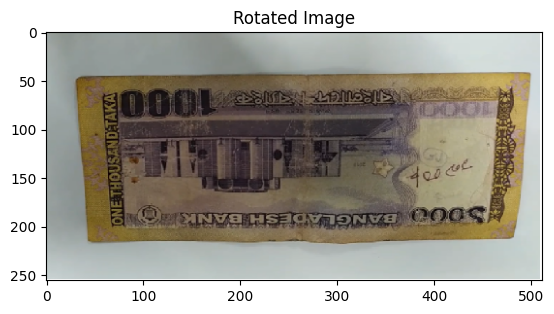

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

aug_cnt = 0

for imgs in range(10):
    img_path = f'Taka/0/{imgs}.png'
    img = image.load_img(img_path, target_size=(256, 512))    #Load Image
    img = image.img_to_array(img)      # Convert to array

    
    img = cv2.rotate(img, cv2.ROTATE_180)  # Fixed rotation

    # Show the rotated image
    plt.imshow(img.astype('uint8'))
    plt.title("Image")
    plt.show()

    # Augmentation setup
    datagen = ImageDataGenerator(
        shear_range=0.1,
        brightness_range=[0.5, 1.5],
        channel_shift_range=50.0,  # Change color intensity
        fill_mode='nearest'
    )

    input_batch = img.reshape(1, 256, 512, 3)
    cnt = 0
    directory = 'Taka_Aug/0' 
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Apply augmentation and save images sequentially
    for output in datagen.flow(input_batch, batch_size=1):
        cnt += 1
        file_name = os.path.join(directory, f"{aug_cnt}.png")  # Save with sequential numbering
        image.array_to_img(output[0]).save(file_name)
        aug_cnt += 1

        if cnt == 5:  # Generate exactly 5 augmented images
            break


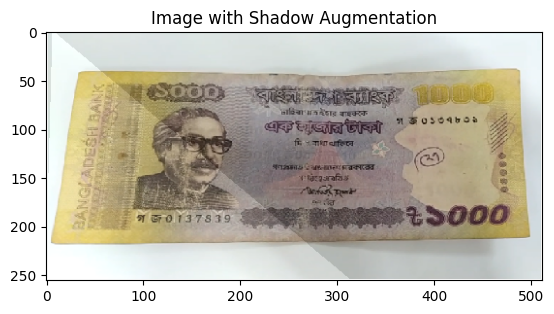

In [6]:
from tensorflow.keras.preprocessing import image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add shadow to an image
def add_shadow(img, shadow_intensity=0.5):
    img_copy = img.copy().astype(np.uint8)  # Ensure uint8 type
    height, width = img.shape[:2]

    # Define shadow coordinates (random diagonal)
    x1, y1 = np.random.randint(0, width//2), 0
    x2, y2 = np.random.randint(width//2, width), height

    # Create a shadow mask
    mask = np.zeros_like(img_copy, dtype=np.uint8)
    cv2.fillPoly(mask, [np.array([[x1, y1], [x2, y2], [width, height], [0, height]])], (50, 50, 50))

    # Ensure mask and image have same dtype
    mask = mask.astype(np.uint8)

    # Blend the shadow mask with the original image
    img_shadow = cv2.addWeighted(img_copy, 1, mask, shadow_intensity, 0, dtype=cv2.CV_8U)

    return img_shadow

# Augmentation and saving loop
for imgs in range(1):
    img_path = f'Taka/0/{imgs}.png'
    
    # Load image
    img = image.load_img(img_path, target_size=(256, 512))
    img = image.img_to_array(img).astype(np.uint8)  # Ensure uint8 type

    # ✅ Apply Shadow Effect
    img = add_shadow(img, shadow_intensity=0.6)  # Adjust intensity for darker/lighter shadows

    # Show the transformed image
    plt.imshow(img)
    plt.title("Image with Shadow Augmentation")
    plt.show()

    # Define output directory
    directory = 'Taka_Aug/0' 
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the shadow-augmented image
    file_name = os.path.join(directory, "shadow_augmented.png")
    image.array_to_img(img).save(file_name)


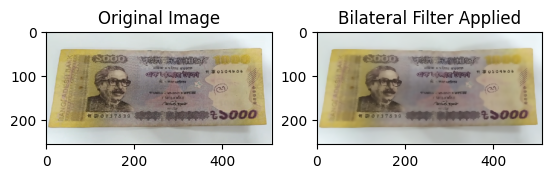

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load image
img_path = 'Taka/0/0.png'
img = image.load_img(img_path, target_size=(256, 512))
img = image.img_to_array(img).astype(np.uint8)  # Ensure uint8 type

# ✅ Apply Bilateral Filtering (Preserve Edges)
filtered_img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Show the filtered image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_img)
plt.title("Bilateral Filter Applied")

plt.show()

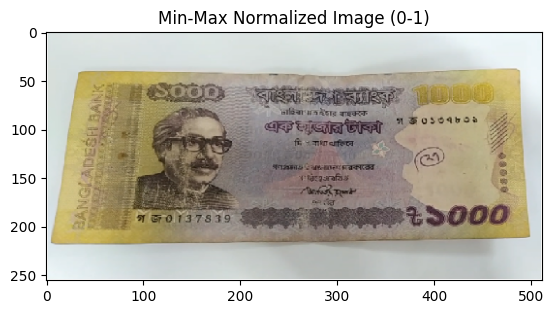

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load image
img_path = 'Taka/0/0.png'
img = image.load_img(img_path, target_size=(256, 512))
img = image.img_to_array(img).astype(np.float32)  # Convert to float

# ✅ Min-Max Normalization (Scaling pixel values to [0,1])
img_minmax = img / 255.0  

# Show the normalized image
plt.imshow(img_minmax)
plt.title("Min-Max Normalized Image (0-1)")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


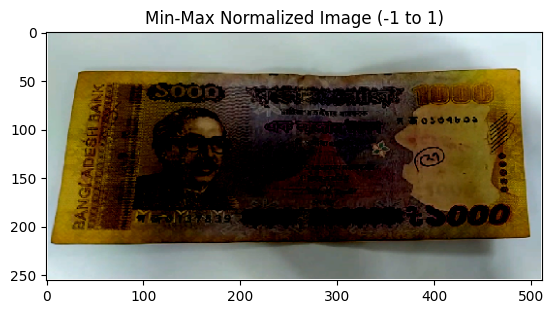

In [9]:
# ✅ Min-Max Normalization (Scaling pixel values to [-1,1])
img_minmax_neg = (img / 127.5) - 1  

plt.imshow(img_minmax_neg)
plt.title("Min-Max Normalized Image (-1 to 1)")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


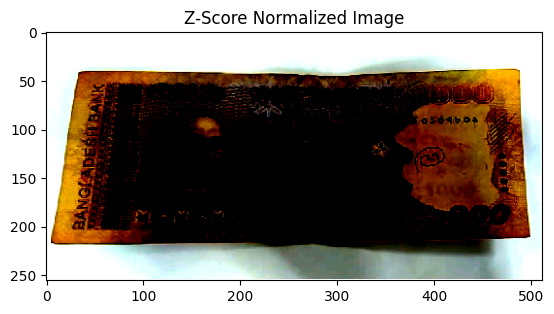

In [10]:
# ✅ Z-Score Normalization (Mean 0, Std 1)
mean = np.mean(img)
std = np.std(img)
img_zscore = (img - mean) / std  

plt.imshow(img_zscore)
plt.title("Z-Score Normalized Image")
plt.show()


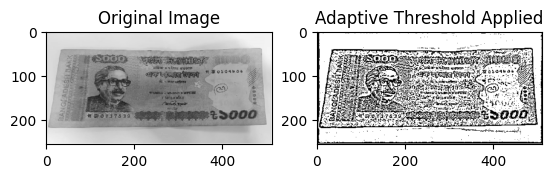

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load image (Convert to grayscale)
img_path = 'Taka/0/0.png'
img = image.load_img(img_path, target_size=(256, 512), color_mode='grayscale')
img = image.img_to_array(img).astype(np.uint8)  # Ensure uint8 type

# ✅ Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    img, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Gaussian-based adaptive thresholding
    cv2.THRESH_BINARY,  # Convert to black & white
    11,  # Block size (Neighborhood size)
    2    # Constant subtracted from mean
)

# Show original vs. thresholded image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold Applied")

plt.show()
